In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor


In [2]:
# Load dataset
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/diamonds.csv')
X_train = df[['carat', 'depth', 'price']]

# Display basic dataset information
print("Dataset Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB
None

Summary Statistics:
              carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.2000

In [7]:
# Apply Local Outlier Factor for outlier detection
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
outlier_labels = lof.fit_predict(X_train)

# Identify outliers
df['Outlier'] = outlier_labels
outliers = df[df['Outlier'] == -1]
print(f"\nNumber of outliers detected: {len(outliers)}")


Number of outliers detected: 2697


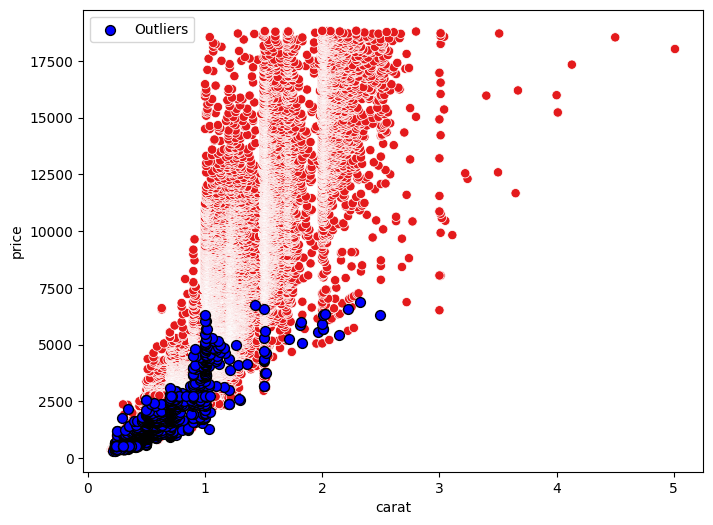

In [8]:
# Visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(x='carat', y='price',
                data=df[df['Outlier'] != -1],
                hue='Outlier', palette='Set1', legend=False, s=45)
plt.scatter(outliers['carat'], outliers['price'], s=50, label='Outliers', c='blue', edgecolors='black')
plt.legend()
plt.show()